# Regression

In [1]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert, Luis Pedro Coelho and Matthieu Brucher
# published by PACKT Publishing
#
# It is made available under the MIT License

import numpy as np
from matplotlib import pyplot as plt

Use the magic command `%matplotlib` to see the plots inline:

In [2]:
%matplotlib inline

## Boston dataset

Load the data

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)

# Index number five in the number of rooms
x = boston.data[:, 5]
x = np.transpose(np.atleast_2d(x))
y = boston.target
y.shape

(506,)

The first regression attempt:

(506, 1) 

3.561 

8.78 

[-2.25801069] 

(1,) 



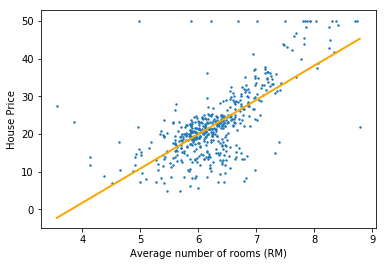

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)

# Index number five in the number of rooms
x = boston.data[:, 5]
y = boston.target

# lr.fit takes a two-dimensional array as input. We use np.atleast_2d
# to convert from one to two dimensional, then transpose to make sure that the
# format matches:
x = np.transpose(np.atleast_2d(x))
print(x.shape, '\n')
lr.fit(x, y)

fig, ax = plt.subplots()
ax.set_xlabel("Average number of rooms (RM)")
ax.set_ylabel("House Price")
xmin = x.min()
xmax = x.max()
print(xmin, '\n')
print(xmax, '\n')
print(lr.predict(np.transpose(np.atleast_2d(xmin))), '\n')
print(lr.predict(np.transpose(np.atleast_2d(xmin))).shape, '\n')
ax.plot([xmin, xmax], [lr.predict(np.transpose(np.atleast_2d(xmin))), lr.predict(np.transpose(np.atleast_2d(xmax)))],
        '-', lw=2, color="#f9a602")
ax.scatter(x, y, s=2)
fig.savefig('Regression_Fig_01.png')

In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, lr.predict(x))
print("Mean squared error (on training data): {:.3}".format(mse))

Mean squared error (on training data): 43.6


In [8]:
rmse = np.sqrt(mse)
print('RMSE (on training data): {}'.format(rmse))

RMSE (on training data): 6.603071389222561


In [9]:
from sklearn.metrics import r2_score
r2 = r2_score(y, lr.predict(x))
print("R2 (on training data): {:.2}".format(r2))
print("Another method for calculation R2: ", lr.score(x,y) )

R2 (on training data): 0.48
Another method for calculation R2:  0.4835254559913343


Repeat, but using all the input variables now

In [10]:
x = boston.data

lr.fit(x,y)

mse = mean_squared_error(y, lr.predict(x))
print("Mean squared error (on training data): {:.3}".format(mse))
rmse = np.sqrt(mse)
print('RMSE (on training data): {}'.format(rmse))
r2 = r2_score(y, lr.predict(x))
print("R2 (on training data): {:.2}".format(r2))

Mean squared error (on training data): 21.9
RMSE (on training data): 4.679191295697281
R2 (on training data): 0.74


To see how well we do, we plot _prediction vs. gold reality_:

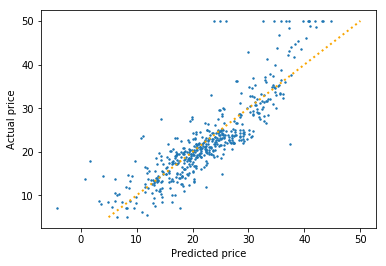

In [11]:
fig,ax = plt.subplots()
ax.set_xlabel('Predicted price')
ax.set_ylabel('Actual price')
ax.plot([y.min(), y.max()], [y.min(), y.max()], ':', lw=2, color="#f9a602")
ax.scatter(lr.predict(x), y, s=2)
fig.savefig("Regression_FIG_02.png")

Now, we will use **cross-validation** for evaluating the regression quality:

In [12]:
from sklearn.model_selection import KFold, cross_val_predict
kf = KFold(n_splits=5)
p = cross_val_predict(lr, x, y, cv=kf)
rmse_cv = np.sqrt(mean_squared_error(p, y))
print('RMSE on 5-fold CV: {:.2}'.format(rmse_cv))

RMSE on 5-fold CV: 6.1


We now compare a few different regression models on _both training data and using cross-validation_:

In [13]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge                              

for name, met in [
        ('linear regression', LinearRegression()),
        ('elastic-net(.5)', ElasticNet(alpha=0.5)),
        ('lasso(.5)', Lasso(alpha=0.5)),
        ('ridge(.5)', Ridge(alpha=0.5)),
]:
    # Fit on the whole data:
    met.fit(x, y)

    # Predict on the whole data:
    p = met.predict(x)
    r2_train = r2_score(y, p)

    kf = KFold(n_splits=5)
    p = np.zeros_like(y)
    for train, test in kf.split(x):
        met.fit(x[train], y[train])
        p[test] = met.predict(x[test])

        r2_cv = r2_score(y, p)
    print('Method: {}'.format(name))
    print('R2 on training: {:.2}'.format(r2_train))
    print('R2 on 5-fold CV: {:.2}'.format(r2_cv))
    print('\n')

Method: linear regression
R2 on training: 0.74
R2 on 5-fold CV: 0.56


Method: elastic-net(.5)
R2 on training: 0.71
R2 on 5-fold CV: 0.64


Method: lasso(.5)
R2 on training: 0.71
R2 on 5-fold CV: 0.59


Method: ridge(.5)
R2 on training: 0.74
R2 on 5-fold CV: 0.58




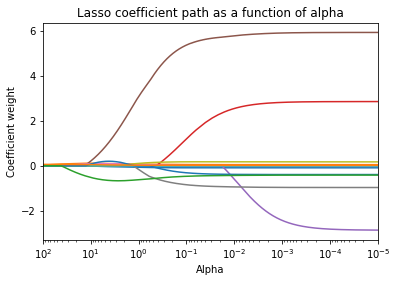

In [14]:
las = Lasso(normalize=True)                            
alphas = np.logspace(-5, 2, 1000)                   
alphas, coefs, _= las.path(x, y, alphas=alphas) 
#print(alphas)

fig,ax = plt.subplots()                             
ax.plot(alphas, coefs.T)                            
ax.set_xscale('log')                                
ax.set_xlim(alphas.max(), alphas.min())             


plt.title('Lasso coefficient path as a function of alpha')                                           
ax.set_xlabel('Alpha')                              
ax.set_ylabel('Coefficient weight')                 
fig.savefig('REGRESSION_FIG_03.png')

## Linear regression with Tensorflow

Let's try and do the same with Tensorflow.

In [15]:
# Batch size, epochs
batch_size = 100
n_epochs = 50000
steps = 1000

In [18]:
# Creation of the scaffolding

import tensorflow as tf
tf.reset_default_graph()

In [29]:
x = boston.data[:,5][:,None]
y = np.reshape(boston.target, (-1, 1))
nb_features = x.shape[1]

X = tf.placeholder(shape=[None, nb_features], dtype=tf.float32, name="X")
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32, name="y")

A = tf.Variable(tf.random_normal(shape=[nb_features, 1]), name="A")
b = tf.Variable(tf.random_normal(shape=[1,1]), name="b")

In [30]:
# Creation of the graph
model_output = tf.matmul(X, A) + b

loss = tf.reduce_mean(tf.square(Y - model_output))

# Uncomment to get Ridge or Lasso
"""
beta = 0.005
regularizer = tf.nn.l2_loss(A)
loss = loss + beta * regularizer
"""
"""
beta = 0.5
regularizer = tf.reduce_mean(tf.abs(A))
loss = loss + beta * regularizer
"""

grad_speed = 1e-3
my_opt = tf.train.GradientDescentOptimizer(grad_speed)
train_step = my_opt.minimize(loss)

In [31]:
# Run the optimization
loss_vec = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        permut = np.random.permutation(len(x))
        for j in range(0, len(x), batch_size):
            batch = permut[j:j+batch_size]
            Xs = x[batch]
            Ys = y[batch]

            sess.run(train_step, feed_dict={X: Xs, Y: Ys})
            temp_loss = sess.run(loss, feed_dict={X: Xs, Y: Ys})
        
        if epoch % steps == steps - 1:
            temp_loss = sess.run(loss, feed_dict={X: x, Y: y})
            loss_vec.append(temp_loss)

            (A_, b_) = sess.run([A, b])
            print('Epoch #%i  A = %s b = %s' % (epoch, np.transpose(A_), b_))
            print('Loss = %.8f' % temp_loss)
            print("")


    [slope, y_intercept] = sess.run([A, b])
    prediction = sess.run(model_output, feed_dict={X: x})
    mse = mean_squared_error(y, prediction)
    print("Mean squared error (on training data): {:.3}".format(mse))
    rmse = np.sqrt(mse)
    print('RMSE (on training data): {}'.format(rmse))
    r2 = r2_score(y, prediction)
    print("R2 (on training data): {:.2}".format(r2))

best_fit = []
for i in x:
    best_fit.append(slope[0]*i+y_intercept[0])

Epoch #999  A = [[4.3068786]] b = [[-4.45379]]
Loss = 54.93619919

Epoch #1999  A = [[5.0202813]] b = [[-8.518932]]
Loss = 52.05839920

Epoch #2999  A = [[5.5513387]] b = [[-12.002595]]
Loss = 49.93685913

Epoch #3999  A = [[5.969459]] b = [[-15.080842]]
Loss = 48.44517517

Epoch #4999  A = [[6.40106]] b = [[-17.72384]]
Loss = 47.19589233

Epoch #5999  A = [[6.799504]] b = [[-19.967535]]
Loss = 46.26666641

Epoch #6999  A = [[7.1065607]] b = [[-21.97429]]
Loss = 45.58660126

Epoch #7999  A = [[7.308749]] b = [[-23.72031]]
Loss = 45.28771591

Epoch #8999  A = [[7.5820265]] b = [[-25.187037]]
Loss = 44.74383926

Epoch #9999  A = [[7.837788]] b = [[-26.445509]]
Loss = 44.46615219

Epoch #10999  A = [[7.98026]] b = [[-27.575354]]
Loss = 44.22264099

Epoch #11999  A = [[8.191675]] b = [[-28.491776]]
Loss = 44.21787643

Epoch #12999  A = [[8.253695]] b = [[-29.341972]]
Loss = 43.95520401

Epoch #13999  A = [[8.358679]] b = [[-30.03587]]
Loss = 43.87425995

Epoch #14999  A = [[8.417835]] b = 

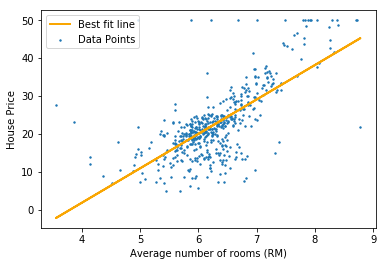

<Figure size 432x288 with 0 Axes>

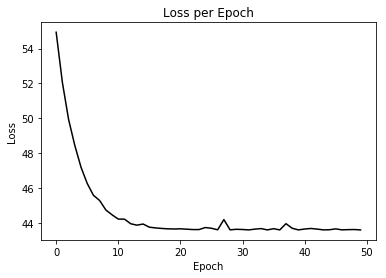

In [32]:
# Plot 1D best fit

fig,ax = plt.subplots()
ax.set_xlabel("Average number of rooms (RM)")
ax.set_ylabel("House Price")

ax.scatter(x, y, s=2, label='Data Points')
ax.plot(x, np.array(best_fit), '-', lw=2, color="#f9a602", label='Best fit line')
ax.legend(loc='upper left')

fig.savefig('REGRESSION_FIG_06.png')

# Plot loss over time
plt.figure()
fig,ax = plt.subplots()
ax.set_title('Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

ax.plot(loss_vec, 'k-')

fig.savefig('REGRESSION_FIG_07.png')

What happens if we move to use all the features?

In [33]:
# Creation of the scaffolding

import tensorflow as tf
tf.reset_default_graph()

x = boston.data
y = np.reshape(boston.target, (-1, 1))

nb_features = x.shape[1]

X = tf.placeholder(shape=[None, nb_features], dtype=tf.float32, name="X")
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32, name="y")

A = tf.Variable(tf.random_normal(shape=[nb_features, 1]), name="A")
b = tf.Variable(tf.random_normal(shape=[1,1]), name="b")

In [34]:
# Creation of the graph
model_output = tf.matmul(X, A) + b

loss = tf.reduce_mean(tf.square(Y - model_output))

# Uncomment to get Ridge or Lasso
"""
beta = 0.005
regularizer = tf.nn.l2_loss(A)
loss = loss + beta * regularizer
"""
"""
beta = 0.5
regularizer = tf.reduce_mean(tf.abs(A))
loss = loss + beta * regularizer
"""

grad_speed = 5e-7
my_opt = tf.train.GradientDescentOptimizer(grad_speed)
train_step = my_opt.minimize(loss)

In [35]:
# Run the optimization
loss_vec = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        permut = np.random.permutation(len(x))
        for j in range(0, len(x), batch_size):
            batch = permut[j:j+batch_size]
            Xs = x[batch]
            Ys = y[batch]

            sess.run(train_step, feed_dict={X: Xs, Y: Ys})
            temp_loss = sess.run(loss, feed_dict={X: Xs, Y: Ys})
        
        if epoch % steps == steps - 1:
            temp_loss = sess.run(loss, feed_dict={X: x, Y: y})
            loss_vec.append(temp_loss)

            (A_, b_) = sess.run([A, b])
            print('Epoch #%i  A = %s b = %s' % (epoch, np.transpose(A_), b_))
            print('Loss = %.8f' % temp_loss)
            print("")


    [slope, y_intercept] = sess.run([A, b])
    prediction = sess.run(model_output, feed_dict={X: x})
    mse = mean_squared_error(y, prediction)
    print("Mean squared error (on training data): {:.3}".format(mse))
    rmse = np.sqrt(mse)
    print('RMSE (on training data): {}'.format(rmse))
    r2 = r2_score(y, prediction)
    print("R2 (on training data): {:.2}".format(r2))

best_fit = []
for i in x:
    best_fit.append(slope[0]*i+y_intercept[0])

Epoch #999  A = [[ 0.35756037  0.24456458  0.4701379  -0.6272518  -0.09628233  1.0018146
   0.11958624  0.19829993  0.94731563 -0.07306526  0.83213586  0.02862701
  -0.6198861 ]] b = [[0.3821294]]
Loss = 71.48053741

Epoch #1999  A = [[ 0.22024183  0.16021498  0.45130345 -0.62543315 -0.09572343  1.0208095
   0.0793207   0.19232652  0.8884387  -0.06210118  0.8157693   0.033075
  -0.6725342 ]] b = [[0.38353008]]
Loss = 58.62100601

Epoch #2999  A = [[ 0.12047334  0.14770935  0.43006328 -0.6236396  -0.09505265  1.0410348
   0.07832725  0.18834257  0.83413464 -0.05452136  0.80084795  0.03206054
  -0.7116197 ]] b = [[0.38512567]]
Loss = 53.52233505

Epoch #3999  A = [[ 0.04878308  0.14103848  0.4095238  -0.62188005 -0.09435978  1.0609348
   0.08112854  0.18417351  0.78630674 -0.0501439   0.7875488   0.03255967
  -0.7404429 ]] b = [[0.38675284]]
Loss = 51.40591812

Epoch #4999  A = [[-0.0028545   0.13787995  0.38930154 -0.6201593  -0.09367151  1.0802246
   0.08524243  0.1792985   0.74411166 

Epoch #38999  A = [[-0.09248792  0.09836821  0.07756558 -0.56116384 -0.06974907  1.6466517
   0.09047925 -0.00568462  0.23913008 -0.01423542  0.47666863  0.02160399
  -0.79211277]] b = [[0.43867582]]
Loss = 38.47349930

Epoch #39999  A = [[-0.09208391  0.09683173  0.07418542 -0.55940163 -0.06904084  1.6626658
   0.08990362 -0.01070735  0.23452233 -0.01228881  0.47144854  0.02362455
  -0.78982836]] b = [[0.44015658]]
Loss = 38.06750107

Epoch #40999  A = [[-0.0914768   0.0968329   0.07082266 -0.5576331  -0.06834327  1.6785954
   0.09021765 -0.01582883  0.23032123 -0.01315314  0.46563363  0.02361241
  -0.7894369 ]] b = [[0.4416043]]
Loss = 37.62086868

Epoch #41999  A = [[-0.09178724  0.09669491  0.06828808 -0.5558624  -0.06764801  1.6942307
   0.09038112 -0.02072678  0.22599417 -0.01559359  0.46026355  0.02134438
  -0.78735083]] b = [[0.44304302]]
Loss = 40.55052185

Epoch #42999  A = [[-0.0913569   0.09673747  0.06605745 -0.55414754 -0.06697483  1.7095666
   0.08964112 -0.02582884  0.2

<Figure size 432x288 with 0 Axes>

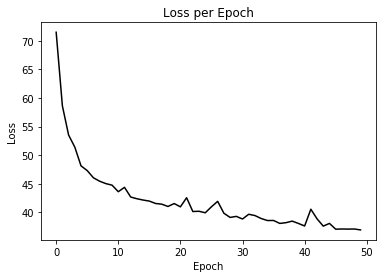

In [36]:
# Plot loss over time
plt.figure()
fig,ax = plt.subplots()
ax.set_title('Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

ax.plot(loss_vec, 'k-')

fig.savefig('REGRESSION_FIG_08.png')

## E2006 Dataset

Load data:


In [37]:
from sklearn.datasets import load_svmlight_file
data, target = load_svmlight_file('data/E2006.train')

In [41]:
data.shape

(16087, 150360)

In [43]:
print('Min target value: {}'.format(target.min()))
print('Max target value: {}'.format(target.max()))
print('Mean target value: {}'.format(target.mean()))
print('Std. dev. target: {}'.format(target.std()))

Min target value: -7.89957807346873
Max target value: -0.519409526940154
Mean target value: -3.5140531366944456
Std. dev. target: 0.6322783539114604


Compute error on training data to demonstrate that we can obtain near perfect scores:

In [44]:
lr = LinearRegression()
lr.fit(data, target)
pred = lr.predict(data) 

print('RMSE on training, {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('R2 on training, {:.2}'.format(r2_score(target, pred)))

RMSE on training, 0.0024
R2 on training, 1.0


However, we do not do so well on cross-validation:

In [45]:
kf = KFold(n_splits=5)
pred = cross_val_predict(lr, data, target, cv=kf)

print('RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))

RMSE on testing (5 fold), 0.75
R2 on testing (5 fold), -0.43


Now, we try _an Elastic net_:

In [46]:
# Edit the lines below if you want to switch method:                                                     
met = ElasticNet(alpha=0.1)
met.fit(data, target)
pred = met.predict(data)

print('[EN 0.1] RMSE on training: {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN 0.1] R2 on training: {:.2}'.format(r2_score(target, pred)))

[EN 0.1] RMSE on training: 0.4
[EN 0.1] R2 on training: 0.61


Not a perfect prediction on the training data anymore, but let us check the value on cross-validation:

In [47]:
pred = cross_val_predict(met, data, target, cv=kf)

print('[EN 0.1] RMSE on testing (5 fold): {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN 0.1] R2 on testing (5 fold): {:.2}'.format(r2_score(target, pred)))

[EN 0.1] RMSE on testing (5 fold): 0.4
[EN 0.1] R2 on testing (5 fold): 0.61


We now use `ElasticNetCV` to set parameters automatically:

In [48]:
from sklearn.linear_model import ElasticNetCV
# Construct an ElasticNetCV object (use all available CPUs)
met = ElasticNetCV(n_jobs=-1)

met.fit(data, target)
pred = met.predict(data)
print('[EN CV] RMSE on training, {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV] R2 on training, {:.2}'.format(r2_score(target, pred)))

pred = cross_val_predict(met, data, target, cv=kf)
print('[EN CV] RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV] R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[EN CV] RMSE on training, 0.37
[EN CV] R2 on training, 0.65


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 

[EN CV] RMSE on testing (5 fold), 0.37
[EN CV] R2 on testing (5 fold), 0.65


This is a a pretty good general-purpose regression object:

In [49]:
# Construct an ElasticNetCV object (use all available CPUs)
met = ElasticNetCV(n_jobs=-1, l1_ratio=[.01, .05, .25, .5, .75, .95, .99])

pred = cross_val_predict(met, data, target, cv=kf)

print('[EN CV l1_ratio] RMSE on testing(5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV l1_ratio] R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 

[EN CV l1_ratio] RMSE on testing(5 fold), 0.37
[EN CV l1_ratio] R2 on testing (5 fold), 0.65


Now the final result:

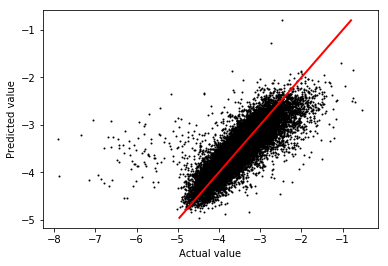

In [54]:
fig, ax = plt.subplots()
ax.scatter(target, pred, c='k', s=1)
#ax.plot([-5,-1], [-5,-1], 'r-', lw=2)
ax.plot([pred.min(), pred.max()], [pred.min(), pred.max()], 'r-', lw=2)
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
fig.savefig('REGRESSION_FIG_05.png')